In [18]:
%pylab inline
import pandas as pd
def p2f(x): 
    if x.startswith('<'):
        return 0.001
    return float(x.strip('%'))/100

Populating the interactive namespace from numpy and matplotlib


In [25]:
cas = pd.read_csv('ca-market-share-2016.csv', sep="\t",names=['rank', 'name', 'usage', 'market share'], converters={'market share':p2f, 'usage': p2f})
cas = cas.drop('rank', axis=1)
cas.index = cas['name']
cas.head()

,name,usage,market share
name,,,
Comodo,Comodo,0.081,0.406
Symantec,Symantec,0.052,0.260
GoDaddy,GoDaddy,0.024,0.118
GlobalSign,GlobalSign,0.019,0.097
IdenTrust,IdenTrust,0.007,0.035


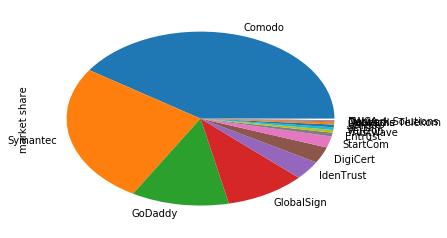

In [27]:
cas[['name', 'market share']].plot.pie(y='market share', legend=False)

In [31]:
browsers = pd.read_csv('browser-market-share-2016.csv', sep="\t", converters={'December':p2f})
browsers.index = browsers['Browser']

browsers.head()

,Browser,November,December,change,relative
Browser,,,,,
IE (all),IE (all),15.45%,0.1516,-0.29%,-1.90%
IE11,IE11,10.40%,0.1026,-0.14%,-1.30%
IE10,IE10,1.44%,0.0137,-0.07%,-4.90%
IE9,IE9,1.48%,0.0144,-0.04%,-2.70%
IE6/7/8,IE6/7/8,2.13%,0.0209,-0.04%,-1.90%


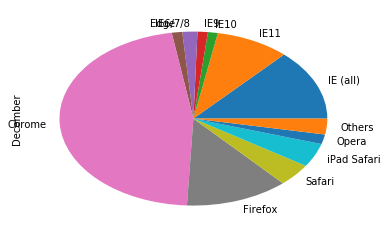

In [32]:
browsers.plot.pie(y='December', legend=False)